In [1]:
%reload_ext autoreload
%autoreload 3
%matplotlib inline

In [2]:
from fastai.tabular import *

In [3]:
path = Path("/home/ricky/Desktop/repos/fastai_course/data/rossmann/")
train_df = pd.read_pickle(path/"train_clean")

In [13]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
Promo_bw,5,5,5,5,5
SchoolHoliday_fw,7,1,5,1,1
StateHoliday_fw,0,0,0,0,0


In [14]:
n = len(train_df); n

844338

In [19]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', "Mean_Humidity"]
small_cat_vars = ["Store", "DayOfWeek", "PromoInterval"]
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ["Sales"]]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ["Sales"]]

In [20]:
idx

array([    89,    278,   1216,   1535, ..., 842836, 843608, 843864, 843915])

In [21]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
89,90,5,NaN,330.0,61,11495
278,279,5,"Jan,Apr,Jul,Oct",2320.0,50,12709
1216,104,4,NaN,390.0,55,10463
1535,424,4,"Jan,Apr,Jul,Oct",1250.0,73,7076
2322,97,3,NaN,8980.0,55,7446


In [22]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [23]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
399852,371,5,"Feb,May,Aug,Nov",1970.0,55,5076
400020,539,5,"Jan,Apr,Jul,Oct",770.0,68,9160
400541,1060,5,"Feb,May,Aug,Nov",3430.0,64,6418
400584,1104,5,"Jan,Apr,Jul,Oct",260.0,68,4435
401723,14,3,"Jan,Apr,Jul,Oct",1300.0,64,4716


In [26]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [27]:
small_train_df["PromoInterval"].cat.codes[:5]

89     -1
278     1
1216   -1
1535    1
2322   -1
dtype: int8

In [28]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [30]:
small_train_df[small_train_df["CompetitionDistance_na"] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
40571,291,5,NaN,2100.0,79,8551,True


In [32]:
train_df = pd.read_pickle(path/"train_clean")
test_df = pd.read_pickle(path/"test_clean")

In [33]:
len(train_df), len(test_df)

(844338, 41088)

In [45]:
proc = [FillMissing, Categorify, Normalize]

In [35]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [36]:
dep_var = "Sales"
df = train_df[cat_vars + cont_vars + [dep_var, "Date"]].copy()

In [37]:
test_df["Date"].min(), test_df["Date"].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [38]:
cut = train_df["Date"][(train_df["Date"] == train_df["Date"][len(test_df)])].index.max()
cut

41395

In [41]:
valid_idx = range(cut)

In [42]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [46]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars,
                           procs=proc)
       .split_by_idx(valid_idx)
       .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
       .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars,
                                    cont_names=cont_vars))
       .databunch())

In [47]:
doc(FloatList)

## Model 

In [49]:
max_log_y = np.log(np.max(train_df["Sales"])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [51]:
learn = tabular_learner(data, layers=[1000, 500], ps=[0.001, 0.01], emb_drop=0.04,
                        y_range=y_range, metrics=exp_rmspe)

In [52]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [54]:
len(data.train_ds.cont_names)

16

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


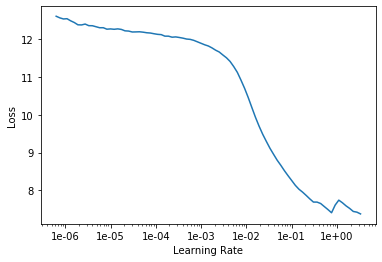

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.023821,0.025339,0.170544,01:44
1,0.024570,0.027724,0.175550,01:38
2,0.017135,0.023228,0.133998,01:37
3,0.013472,0.011672,0.106345,01:43
4,0.010514,0.010698,0.105637,01:38


In [58]:
learn.save("1")

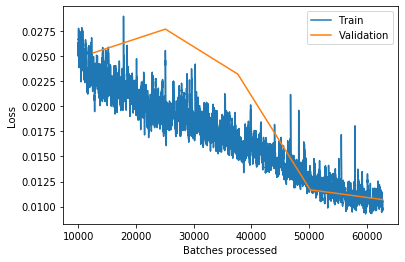

In [59]:
learn.recorder.plot_losses(skip_start=10000)

In [60]:
learn.load("1");

In [62]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.012827,0.012886,0.107992,01:41
1,0.011985,0.014009,0.111019,01:42
2,0.011520,0.013130,0.109508,01:42
3,0.009632,0.015214,0.113863,01:43
4,0.009770,0.012976,0.107279,01:43


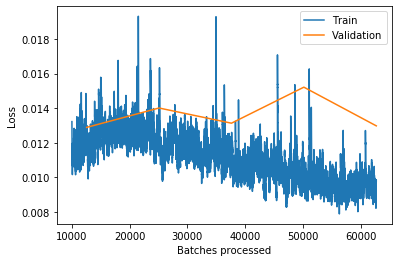

In [64]:
learn.recorder.plot_losses(skip_start=10000)

In [65]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.010698,0.013128,0.110030,01:41
1,0.012287,0.016220,0.121496,01:41
2,0.010897,0.014059,0.112638,01:39
3,0.010340,0.012827,0.108864,01:36
4,0.009185,0.012837,0.110778,01:36


In [67]:
test_preds = learn.get_preds(DatasetType.Test)
test_df["Sales"] = np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id", "Sales"]] = test_df[["Id", "Sales"]].astype("int")
test_df[["Id", "Sales"]].to_csv("rossmann_submission.csv", index=False)